# HR Analytics : Job Change of Data Scientists
- https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

## Data introduction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

font_name = fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
mpl.style.use('seaborn')
mpl.rcParams["font.family"] = font_name
mpl.rcParams["font.size"] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.unicode_minus'] = False

train = pd.read_csv('hr_data/aug_train.csv')
test = pd.read_csv('hr_data/aug_test.csv')
submission = pd.read_csv('hr_data/sample_submission.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

- enrollee_id : 후보자 고유 ID
- city: 도시 코드
- city_ development _index : 도시 개발  지수
- gender: 후보자의 성별
- relevent_experience: 관련 경험 유/무
- enrolled_university: 대학 입학 여부
- education_level: 지원자의 교육 수준
    - Primary School    초등학교 졸업
    - High School       중/고등학교 졸업
    - Graduate          학사
    - Masters           석사
    - Phd               박사
- major_discipline : 주전공
- experience: 경력(년)
- company_size: 현재 회사의 직원 수
- company_type : 현재 회사 타입
    - Pvt Ltd 비상장회사
    - Funded Startup 투자받은 스타트업
    - Public Sector 공기업
    - Early Stage Startup 초기 스타트업
    - NGO  non-governmental organization 비정부기구
- last_new_job: 현재 직장 직전 공백기
- training_hours: 교육이수시간
- target: 이직희망여부 0 – 이직을 찾고 있지 않음, 1 – 이직을 찾고 있음

# EDA (Exploratory Data Analysis) 
- 데이터가 불균형합니다. (The dataset is imbalanced.)
- 대부분의 변수는 범주형이며, 일부는 높은 카디널리티를 가집니다. (Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.)
- 결측값의 처리가 중요합니다. (Missing imputation can be a part of your pipeline as well.)

## missing value

In [3]:
train.isnull().sum().sort_values(ascending=False)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

In [4]:
# columns별 Nan 비율
for c in train.columns:
    if c == 'company_type' or c == 'company_size' or c == 'gender' or c == 'major_discipline':
        print(f'😎column : {c}')
        print(train[c].value_counts(normalize=True, dropna=False))

😎column : gender
Male      0.690103
NaN       0.235306
Female    0.064621
Other     0.009970
Name: gender, dtype: float64
😎column : major_discipline
STEM               0.756446
NaN                0.146832
Humanities         0.034920
Other              0.019887
Business Degree    0.017069
Arts               0.013206
No Major           0.011640
Name: major_discipline, dtype: float64
😎column : company_size
NaN          0.309949
50-99        0.160925
100-500      0.134200
10000+       0.105387
10/49        0.076783
1000-4999    0.069318
<10          0.068274
500-999      0.045777
5000-9999    0.029387
Name: company_size, dtype: float64
😎column : company_type
Pvt Ltd                0.512423
NaN                    0.320493
Funded Startup         0.052250
Public Sector          0.049849
Early Stage Startup    0.031475
NGO                    0.027195
Other                  0.006316
Name: company_type, dtype: float64


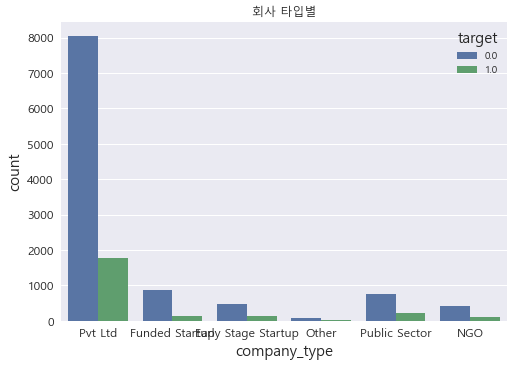

In [5]:
sns.countplot(x='company_type', hue='target', data=train)
plt.title('회사 타입별')
plt.show()

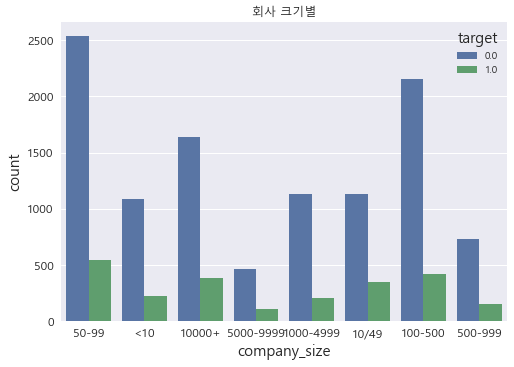

In [6]:
sns.countplot(x='company_size', hue='target', data=train)
plt.title('회사 크기별')
plt.show()

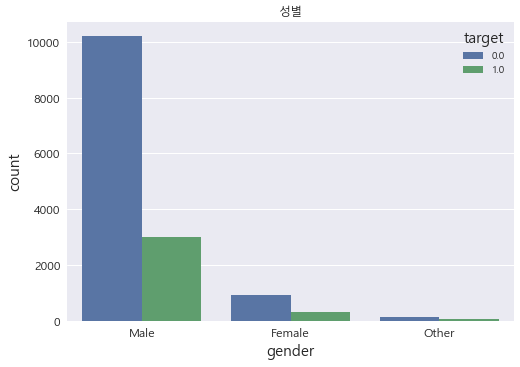

In [7]:
sns.countplot(x='gender', hue='target', data=train)
plt.title('성별')
plt.show()

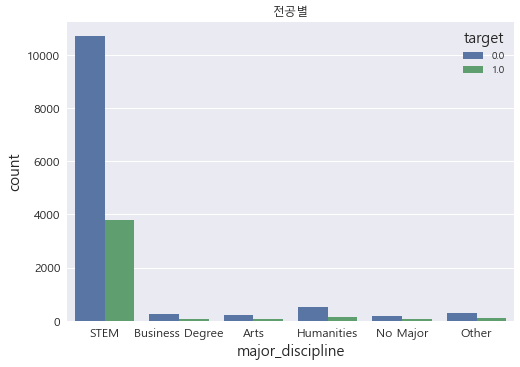

In [8]:
sns.countplot(x='major_discipline', hue='target', data=train)
plt.title('전공별')
plt.show()

## 데이터 불균형

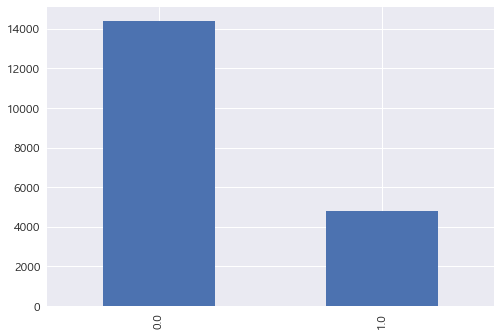

In [9]:
train['target'].value_counts().plot.bar()

plt.show()

## Categorical Data와 Target과의 관계 시각화

In [10]:
train.fillna('NAN', inplace=True)

In [11]:
toplotlist = list(train.isna().sum().sort_values(ascending=False).index)
toplotlist.remove('city')
toplotlist.remove('city_development_index')
toplotlist.remove('training_hours')
# toplotlist.remove('enrollee_id')

In [12]:
toplotlist

['enrollee_id',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'target']

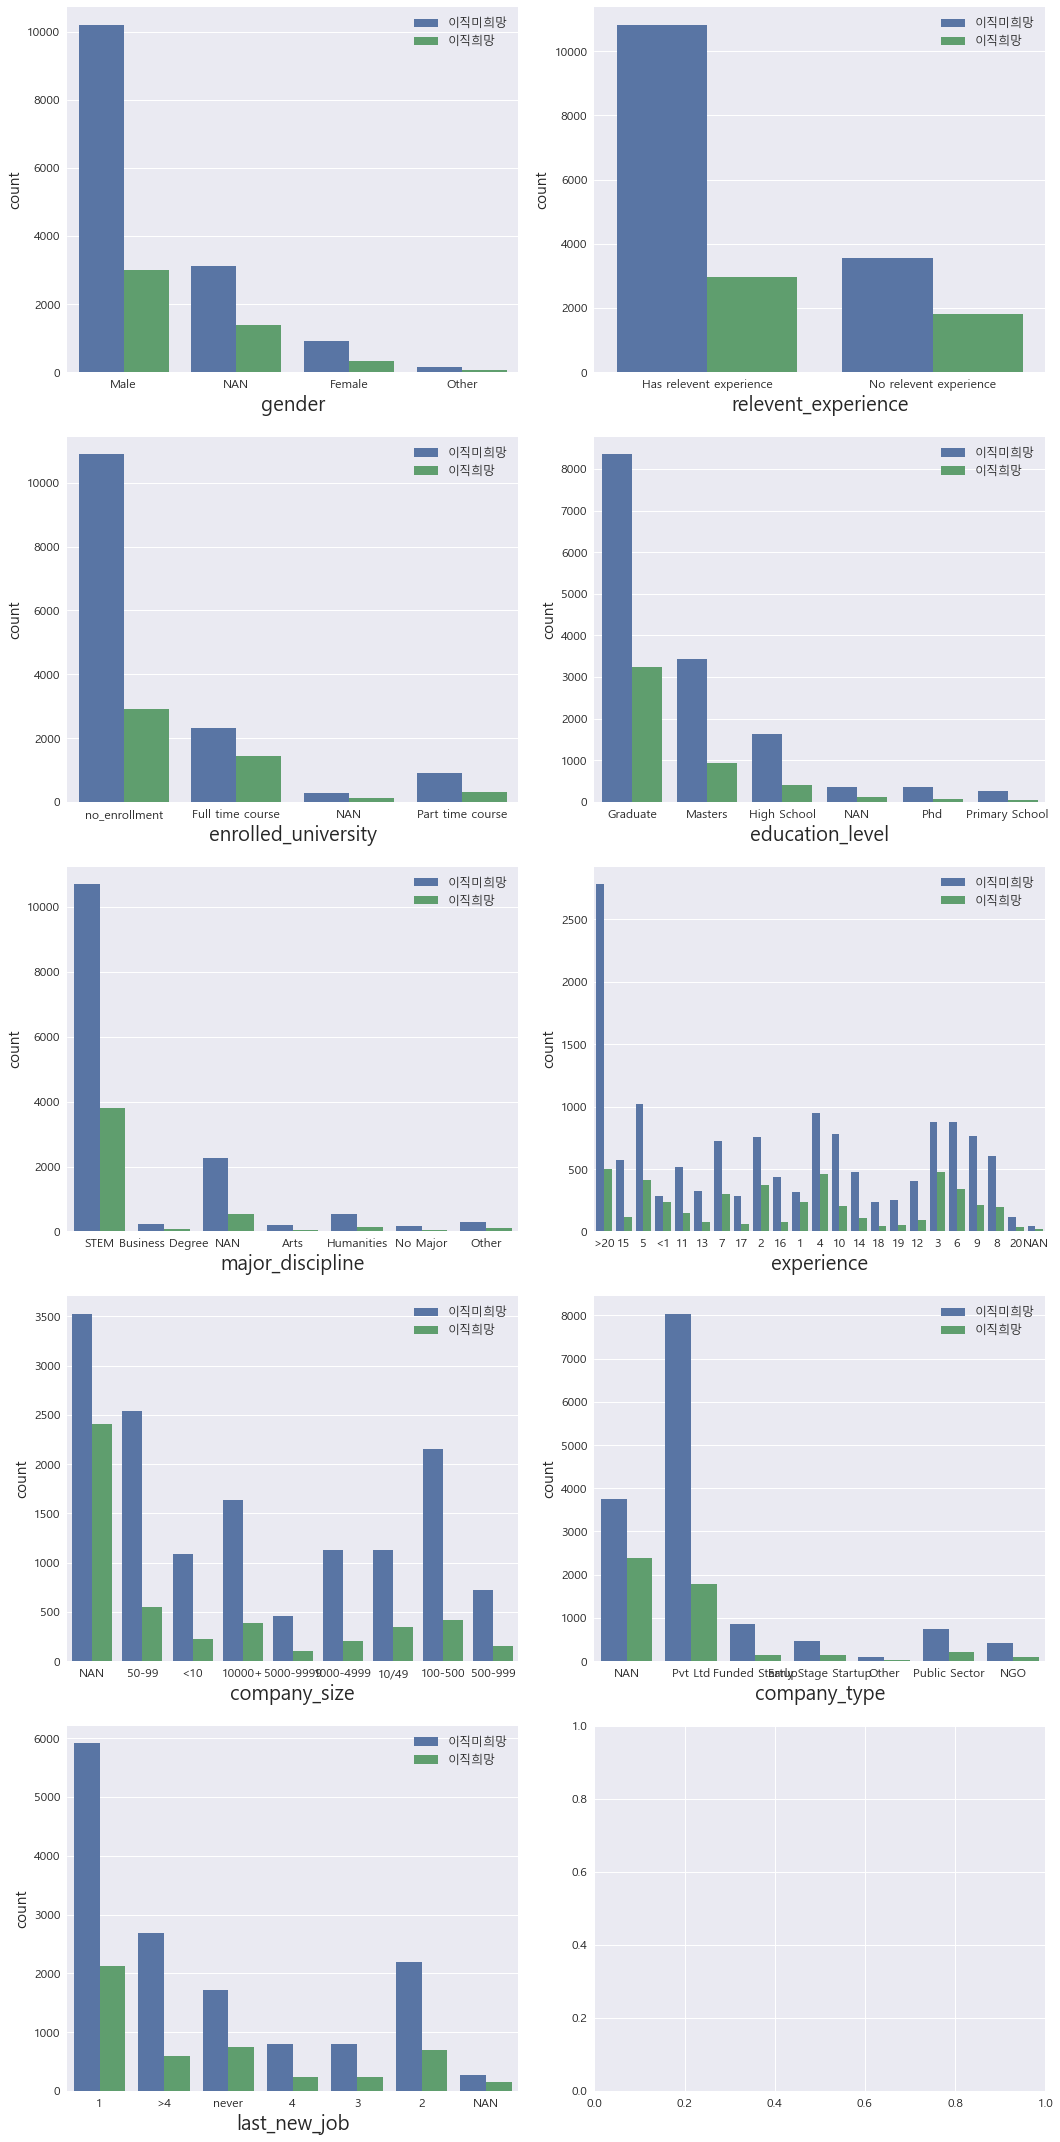

In [13]:
num_plot_lst = ['city_development_index','training_hours']
# for i in num_plot_lst:
#     toplotlist.remove(i)
toplotlist.remove('target')
toplotlist.remove('enrollee_id')
obj_plot_lst = toplotlist

n = 2 # 열 수
fig, axes = plt.subplots(nrows=(len(obj_plot_lst)+1)//2, ncols=n, figsize=(15,30))
for idx, i in enumerate(obj_plot_lst):
    sns.countplot(x=i, hue='target', data=train, ax=axes[idx//n, idx%n])
    axes[idx//n, idx%n].set_xlabel(i, fontsize=20)
    axes[idx//n, idx%n].legend(['이직미희망', '이직희망'],
                               bbox_to_anchor=(1,1), loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


In [14]:
train.loc[train['company_size']=='<10', 'company_size'] = '~10'
train.loc[train['company_size']=='10/49', 'company_size'] = '10~49'

company_siz = ['~10', '10~49', '50-99', '100-500', '500-999','1000-4999','5000-9999','10000+']
for i, v in enumerate(company_siz):
    train.loc[train['company_size']==v, 'company_size'] = i

In [15]:
train.loc[train['experience'] == '>20', 'experience'] = 21
train.loc[train['experience'] == '<1', 'experience'] = 0
# train['experience'] = pd.to_numeric(train['experience'], downcast='integer')

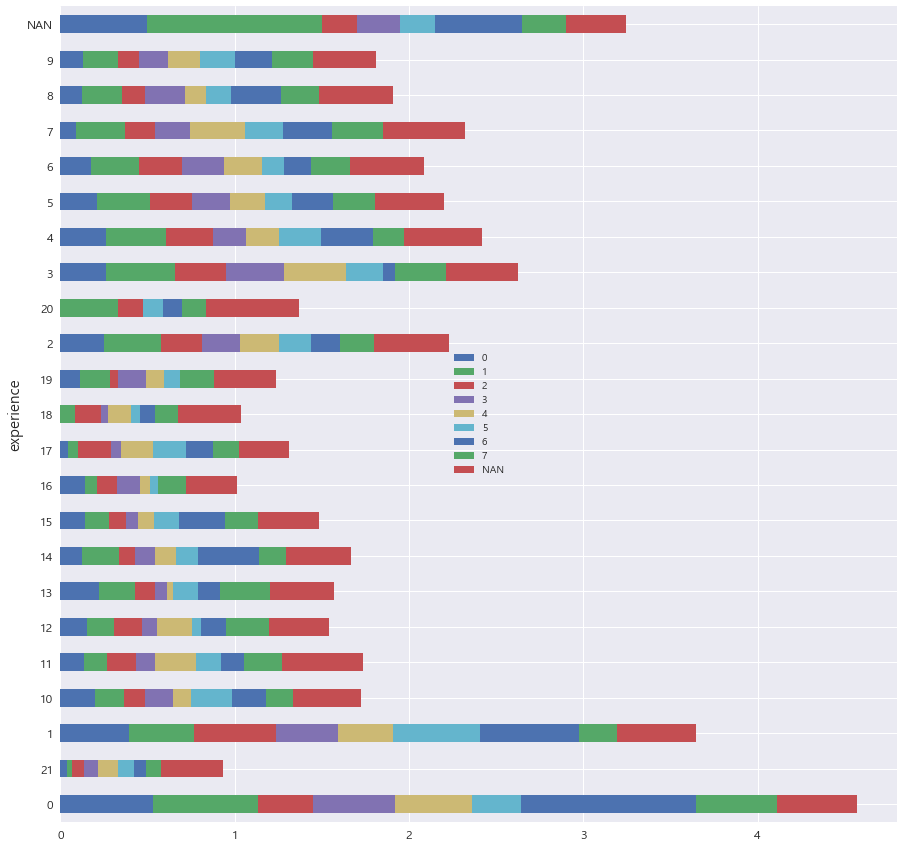

In [16]:
train.pivot_table(values='target', index='experience', 
                  columns='company_size', aggfunc='mean').plot.barh(figsize=(15, 15), stacked=True)

plt.legend(loc='center')
plt.show()

## Numeric Data와 target과의 관계 시각화

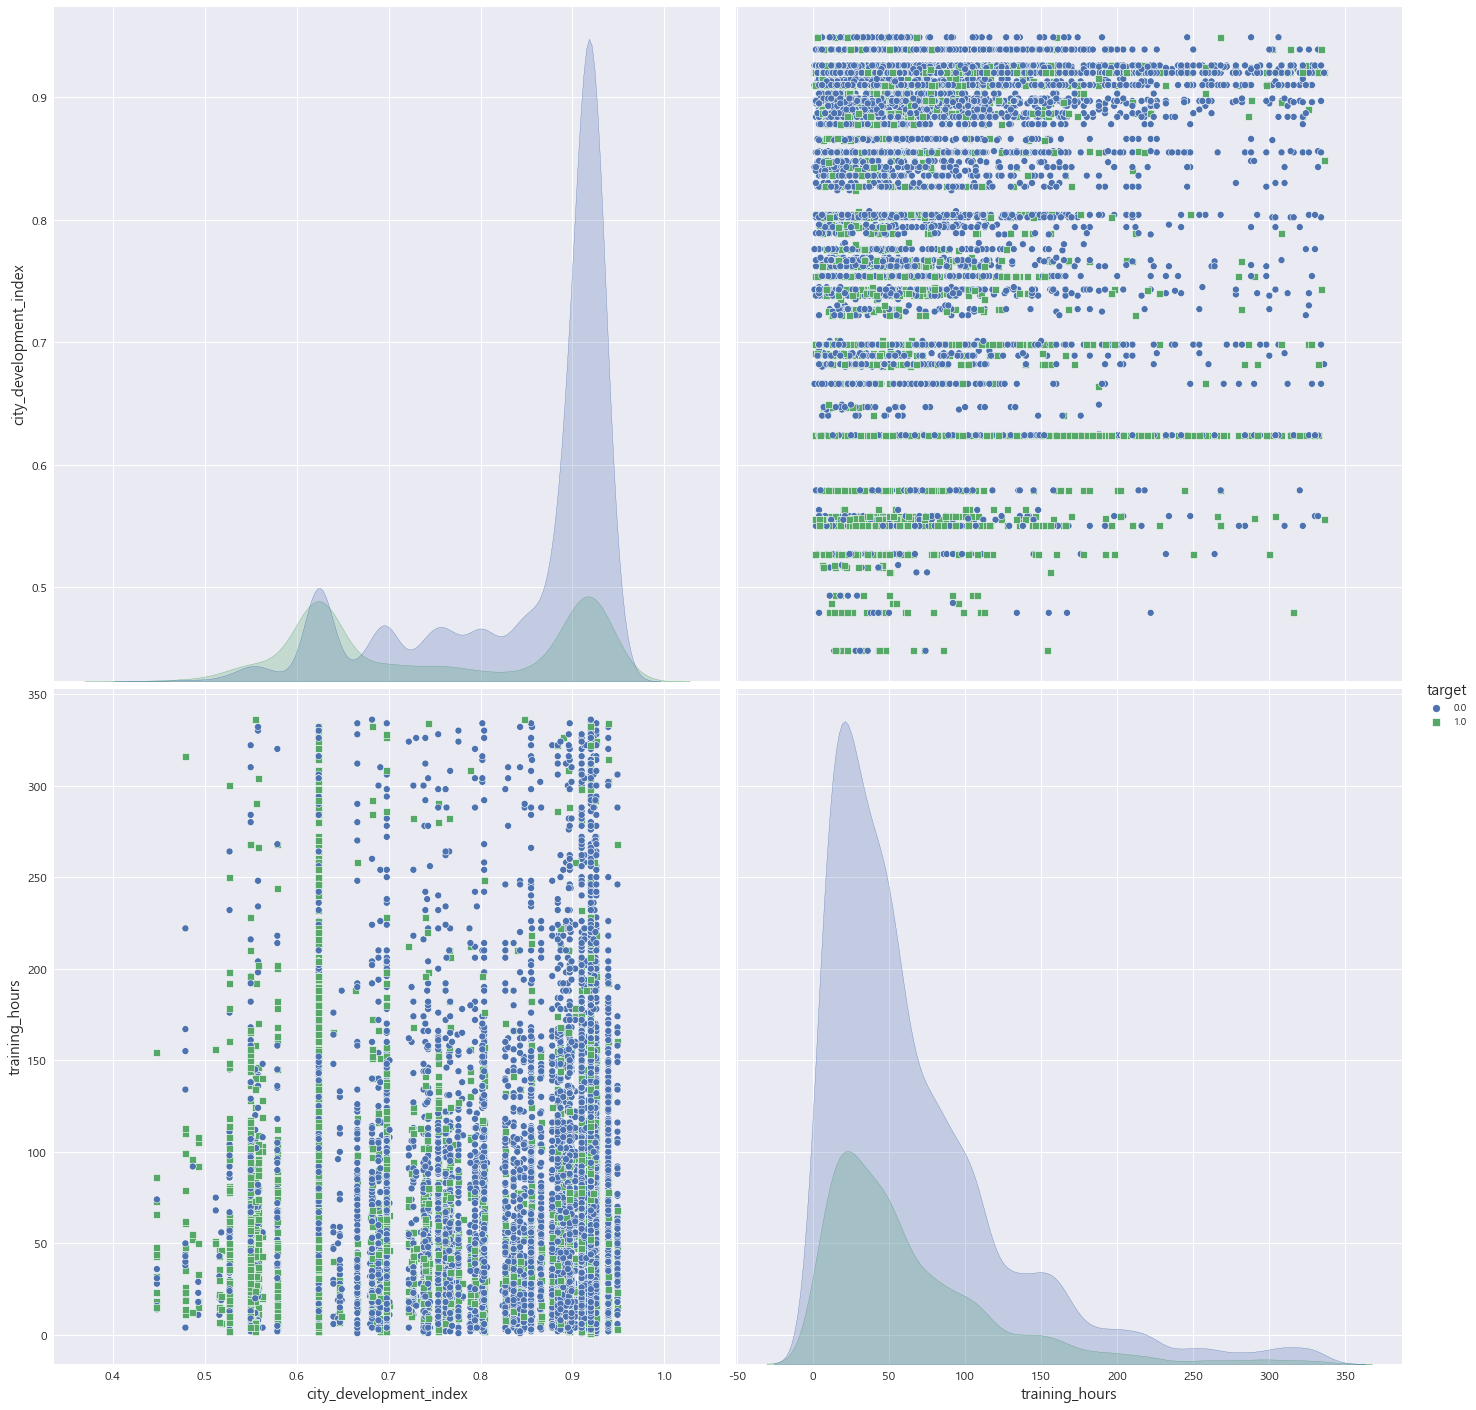

In [17]:
diff = ['city_development_index', 'training_hours']

sns.pairplot(train[diff + ['target']], hue = 'target', 
             x_vars = diff, y_vars = diff,markers=["o", "s"], height=10)

plt.show()

# 초록 = 이직을 희망하는 경우
# 파랑 = 이직을 희망하지 않는 경우

## 결론과 가정
- 결측치 처리
- 불균형 해결
- 경력(experience)가 이직 여부에 영향이 있을 것이다.
- city_develope_index가 이직 여부에 영향이 있을 것이다.

# 데이터 전처리

In [18]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

mpl.style.use('seaborn')
mpl.rcParams["font.family"] = 'Malgun Gothic'
mpl.rcParams["axes.unicode_minus"] = False

In [19]:
X_train = pd.read_csv('hr_data/aug_train.csv')
X_test = pd.read_csv('hr_data/aug_test.csv')

In [20]:
X = pd.concat([X_train, X_test])
# X.drop(columns=['enrollee_id','target'],inplace=True)

# 전처리

# **범주형에서 숫자형으로 변경 컬럼**
### 1. **education_level** : 학력
### 2. **last_new_job** : 현재_직장_직전_공백기
### 3. **experience** : 직무 경력
### 4. **enrolled_university** : 대학 교육 과정
- 순위형 변수의 특징을 갖고 있어 숫자형 타입으로 변경

------------
## 1. education_level type change to integer
- `4` <= `'Phd'`
- `3` <= `'Masters'`
- `2` <= `'Graduate'`
- `1` <= `'High School'`
- `0` <= `'Primary School'`

In [21]:
education_level = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']
for i, v in enumerate(education_level):
    X.loc[X['education_level']==v, 'education_level'] = i

In [22]:
X['education_level'].value_counts(dropna=False)

2.0    12867
3.0     4857
1.0     2239
NaN      512
4.0      468
0.0      344
Name: education_level, dtype: int64

------------
## 2. last_new_job type change to integer
- `5` <= `>4`
- `0` <= `never`

In [23]:
X.loc[X['last_new_job'] == '>4', 'last_new_job'] = 5
X.loc[X['last_new_job'] == 'never', 'last_new_job'] = 0

X['last_new_job'] = pd.to_numeric(X['last_new_job'], downcast='integer')

In [24]:
X['last_new_job'].value_counts()

1.0    8924
5.0    3643
2.0    3242
0.0    2710
3.0    1157
4.0    1148
Name: last_new_job, dtype: int64

------------
## 3. experience type change to integer
- `21` <= `'>20'`
- `0` <= `'<1'`

In [25]:
X.loc[X['experience'] == '>20', 'experience'] = 21
X.loc[X['experience'] == '<1', 'experience'] = 0

X['experience'] = pd.to_numeric(X['experience'], downcast='integer')

In [26]:
X['experience'].value_counts(dropna=False)

21.0    3669
5.0     1593
4.0     1548
3.0     1508
6.0     1346
2.0     1255
7.0     1144
9.0     1093
10.0    1081
8.0      884
11.0     750
15.0     745
14.0     641
1.0      605
0.0      596
16.0     576
12.0     546
13.0     453
17.0     378
19.0     333
18.0     306
20.0     167
NaN       70
Name: experience, dtype: int64

------------
## 4. enrolled_university type change to integer
- `2` <= `'Full time course'`
- `1` <= `'Part time course'`
- `0` <= `'no_enrollment'`

In [27]:
enrolls = ['no_enrollment','Part time course','Full time course']
for i,v in enumerate(enrolls):
    X.loc[X['enrolled_university'] == v, 'enrolled_university'] = i

In [28]:
X['enrolled_university'].value_counts(dropna=False)

0.0    15336
2.0     4192
1.0     1342
NaN      417
Name: enrolled_university, dtype: int64

## 1차 전처리: 결측치를 반반 남녀로 배분
#### gender: Nan          => Male/Female
#### company_size, type => 'Unknown'
#### major: Nan            => 비율 맞춰 major/nomajor

## 1. gender 결측치 처리

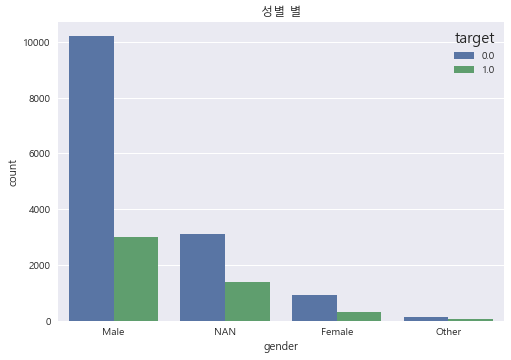

In [29]:
X['gender'].fillna('NAN', inplace=True)
sns.countplot(x='gender', hue='target', data=X)
plt.title('성별 별')
plt.show()
X.loc[X['gender']=='NAN', 'gender'] = np.nan

In [30]:
gender_nan_cnt = X['gender'].isna().sum()//2
X['gender'].fillna('Female', limit=gender_nan_cnt, inplace=True)
X['gender'].fillna('Male', inplace=True)

## 2. company_size, type 결측치 처리
- 결측치 unknown으로 명시

- 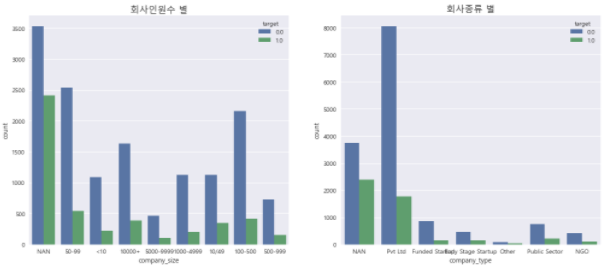

In [31]:
X.loc[X['company_size'].isna(), 'company_size'] = 'unknown'
X.loc[X['company_type'].isna(), 'company_type'] = 'unknown'

## 3. major_discipline(전공) 결측치 처리
- 결측치를 최빈값에 넣어주고 최빈값과 나머지값들의 차이가 많이 나므로 major, no_major로 재정의해준다.
- 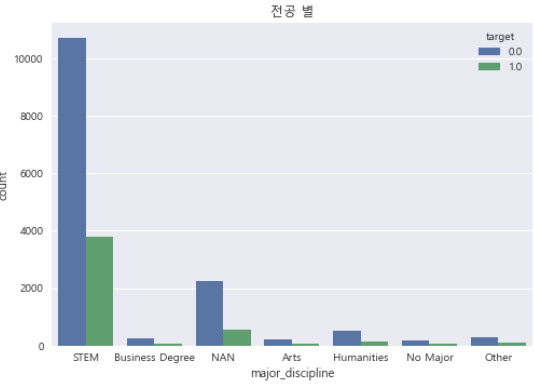

In [32]:
X['major_discipline'].fillna('major', inplace=True)
X.loc[X['major_discipline']=='STEM', 'major_discipline'] = 'major'
X.loc[X['major_discipline']!='STEM', 'major_discipline'] = 'no_major'

### 최종 결측치 처리: KNN

In [33]:
from sklearn.impute import KNNImputer

KNN_list = ['enrolled_university', 'education_level', 'experience', 'last_new_job']

imputer = KNNImputer(n_neighbors = 1)
X[KNN_list] = imputer.fit_transform(X[KNN_list])

In [34]:
### 인코딩 전 현재 위아래로 concat되있어 
### 중복되있으므로 인덱스 순번대로 재지정

In [35]:
X.reset_index(drop=True, inplace=True)

## 1차 전처리:  city-lbe, elseobject-ohe

#### 라벨 인코딩

In [36]:
X['city'] = LabelEncoder().fit_transform(X['city'])

#### 원핫인코딩

In [37]:
to_ohe = list(X.columns[X[X.columns].dtypes == 'object'])
to_ohe

['gender',
 'relevent_experience',
 'major_discipline',
 'company_size',
 'company_type']

In [38]:
# 원핫 인코딩x 컬럼들
X_not_ohe = X.loc[:,~X.columns.isin(to_ohe)]
X_not_ohe.shape, X_not_ohe.columns

((21287, 9),
 Index(['enrollee_id', 'city', 'city_development_index', 'enrolled_university',
        'education_level', 'experience', 'last_new_job', 'training_hours',
        'target'],
       dtype='object'))

In [39]:
# 원핫 인코딩 컬럼들
X_ohe = X[to_ohe]
X_ohe

,gender,relevent_experience,major_discipline,company_size,company_type
0,Male,Has relevent experience,no_major,unknown,unknown
1,Male,No relevent experience,no_major,50-99,Pvt Ltd
2,Female,No relevent experience,no_major,unknown,unknown
3,Female,No relevent experience,no_major,unknown,Pvt Ltd
4,Male,Has relevent experience,no_major,50-99,Funded Startup
...,...,...,...,...,...
21282,Male,No relevent experience,no_major,unknown,Public Sector
21283,Male,Has relevent experience,no_major,unknown,unknown
21284,Male,No relevent experience,no_major,unknown,Pvt Ltd
21285,Male,Has relevent experience,no_major,100-500,Public Sector


In [40]:
# 원핫인코딩 실행
ohe = OneHotEncoder(sparse=False)
X_df = ohe.fit_transform(X_ohe)
X_ohe = pd.DataFrame(X_df, columns=ohe.get_feature_names())
X_ohe.shape, X_ohe.columns

# 합치기
X_new = pd.concat([X_ohe, X_not_ohe], axis=1)
X_new

X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   x0_Female                   21287 non-null  float64
 1   x0_Male                     21287 non-null  float64
 2   x0_Other                    21287 non-null  float64
 3   x1_Has relevent experience  21287 non-null  float64
 4   x1_No relevent experience   21287 non-null  float64
 5   x2_no_major                 21287 non-null  float64
 6   x3_10/49                    21287 non-null  float64
 7   x3_100-500                  21287 non-null  float64
 8   x3_1000-4999                21287 non-null  float64
 9   x3_10000+                   21287 non-null  float64
 10  x3_50-99                    21287 non-null  float64
 11  x3_500-999                  21287 non-null  float64
 12  x3_5000-9999                21287 non-null  float64
 13  x3_<10                      212

### StandardScaled

In [88]:
from sklearn.preprocessing import StandardScaler

y_tmp = X_new['target']
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_new.columns)
X_scaled_df.drop(columns='target',inplace=True)
X_scaled_df = pd.concat([X_scaled_df, y_tmp], axis=1)

#### enrollee_id 제거, 다시 train,test 분리 후 target 분리

In [89]:
X_scaled_df.loc[X_scaled_df.index,'target']

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
21282    NaN
21283    NaN
21284    NaN
21285    NaN
21286    NaN
Name: target, Length: 21287, dtype: float64

In [90]:
X_scaled_df.fillna(-1, inplace=True)

In [110]:
X_train = X_scaled_df.loc[X_scaled_df['target']!=-1].copy()
X_test = X_scaled_df.loc[X_scaled_df['target']==-1].copy()

X_train_final = X_train.copy()
X_test_final = X_test.copy()

In [111]:
X_test.drop(columns='target',inplace=True)

# 모델링

In [94]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.metrics import roc_auc_score, f1_score, plot_confusion_matrix, \
#     plot_roc_curve, plot_precision_recall_curve, classification_report, precision_score, recall_score

mpl.style.use('seaborn')

In [95]:
def show_report(model, model_name, X_val, y_val, pred_val):
    y_pred_proba = model.predict_proba(X_val)[:,1]

    df_report = pd.DataFrame(columns={'ROC-AUC'}, data=[0])
    df_report['ROC-AUC'] = roc_auc_score(y_val, y_pred_proba)
    df_report['F1'] = f1_score(y_val, pred_val)
    df_report['precision_0'] = precision_score(y_val, pred_val, pos_label=0)
    df_report['recall_0'] = recall_score(y_val, pred_val, pos_label=0)
    df_report['precision_1'] = precision_score(y_val, pred_val, pos_label=1)
    df_report['recall_1'] = recall_score(y_val, pred_val, pos_label=1)

    df_report.index = [model_name]
    return df_report

def score_graph(model, model_name, X_val, y_val, pred_val):
    # ROC curve 그리는 코드
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

    plot_precision_recall_curve(model, X_val, y_val, ax=ax1)
    plot_roc_curve(model, X_val, y_val, ax=ax2)
    plt.title(model_name)
    plt.show()

In [96]:
X = X_train
y = X_train['target']
X.drop(columns='target', inplace=True)

In [97]:
# columns에 ,나 <가 들어가면 안되므로 수정 : list(X_train.columns)로 확인
# 'company_size_<10'
X.rename(columns = {'company_size_<10':'company_size__10'}, inplace = True)
X.rename(columns = {'x3_<10':'x3__10'}, inplace = True)
X_test_final.rename(columns = {'company_size_<10':'company_size__10'}, inplace = True)
X_test_final.rename(columns = {'x3_<10':'x3__10'}, inplace = True)

In [99]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((14368, 30), (4790, 30), (14368,), (4790,))

- - -
# XGBoost_randomized

In [100]:
param = dict(
    n_estimators=[100, 200, 300, 400, 500],
    learning_rate=[0.001,0.005,0.01,0.05,0.1,0.5],
    max_depth=range(1, 7)
)

In [101]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200,
                   learning_rate=0.5,
                   max_depth=2,
                   random_state=1)
xgb.fit(X_train, y_train)

[18:57:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=6, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
random_xgb = RandomizedSearchCV(xgb,
                             param_distributions=param,
                             n_iter=10,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             random_state=1
                             )
random_xgb.fit(X_train, y_train)

be = random_xgb.best_estimator_
pd.Series(be.feature_importances_, index=X_train.columns).sort_values(ascending=False)

[18:57:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


x3_unknown                    0.349241
city_development_index        0.239719
education_level               0.072533
x4_unknown                    0.046587
x4_Pvt Ltd                    0.036555
x1_Has relevent experience    0.026984
city                          0.022916
last_new_job                  0.022523
enrolled_university           0.018052
experience                    0.017916
x0_Male                       0.014707
x3_1000-4999                  0.013463
x3_50-99                      0.013080
x3__10                        0.011920
x4_Public Sector              0.011356
enrollee_id                   0.011234
x3_5000-9999                  0.010585
x3_10/49                      0.010564
training_hours                0.010414
x3_100-500                    0.009484
x4_Funded Startup             0.009369
x4_Other                      0.008244
x3_500-999                    0.007548
x0_Female                     0.005006
x4_NGO                        0.000000
x3_10000+                

In [103]:
pred_train = random_xgb.predict(X_train)
pred_val = random_xgb.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.8076976614699332
validation accuracy : 0.792901878914405


## ROC Curve vs. PR Curve (feat. 김성환 강사님)
- ROC: 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- PR curve(Precision Recall 커브): 양성 클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [104]:
show_report(random_xgb, "XGB", X_val, y_val, pred_val)

,ROC-AUC,F1,precision_0,recall_0,precision_1,recall_1
XGB,0.804419,0.585284,0.862472,0.861513,0.584307,0.586265


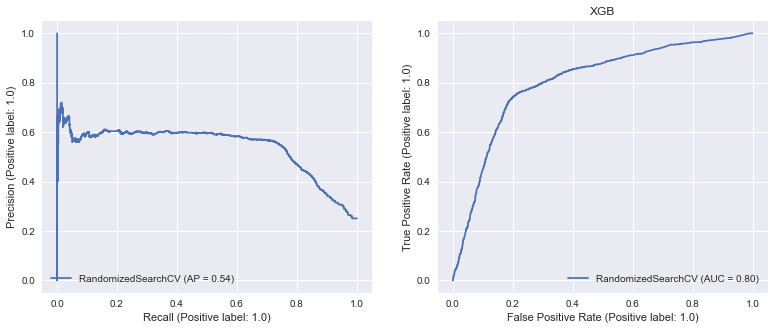

In [62]:
score_graph(random_xgb, "XGB", X_val, y_val, pred_val)

### Polynomial 컬럼 추가(Trial&Error) XGBoost모델 feature_importances_ 기준

#### 중요도 컬럼뽑기 - 랜덤서치(nopoly,no oversampling) 한번 실행후

In [64]:
imprt_lst = pd.Series(be.feature_importances_, index=X_train.columns).sort_values(ascending=False)
to_poly_lst = list(imprt_lst[imprt_lst>imprt_lst.quantile(q=0.8)].index)
to_poly_lst

['x3_unknown',
 'city_development_index',
 'education_level',
 'x4_unknown',
 'x4_Pvt Ltd',
 'x1_Has relevent experience']

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly_f = PolynomialFeatures(degree=2, include_bias=False)
poly_f1 = PolynomialFeatures(degree=2, include_bias=False)

poly_train = poly_f.fit_transform(X.loc[:,X.columns.isin(to_poly_lst)])
poly_test = poly_f1.fit_transform(X_test.loc[:,X_test.columns.isin(to_poly_lst)])

X_train_poly_tomerge = pd.DataFrame(poly_train, columns=poly_f.get_feature_names())
X_test_poly_tomerge = pd.DataFrame(poly_test, columns=poly_f1.get_feature_names())

X_train_poly = pd.concat([X, X_train_poly_tomerge], axis=1)
X_test_poly = pd.concat([X_test, X_test_poly_tomerge], axis=1)

In [66]:
vars_poly = {f'x{i}':v for i,v in enumerate(to_poly_lst)}
vars_poly

{'x0': 'x3_unknown',
 'x1': 'city_development_index',
 'x2': 'education_level',
 'x3': 'x4_unknown',
 'x4': 'x4_Pvt Ltd',
 'x5': 'x1_Has relevent experience'}

In [67]:
X_train_poly, X_val_poly, y_train_poly, y_val_poly = train_test_split(X_train_poly, y, stratify=y, shuffle=True, random_state=1)
X_train_poly.shape, X_val_poly.shape, y_train_poly.shape, y_val_poly.shape

((14368, 57), (4790, 57), (14368,), (4790,))

In [68]:
X_train_poly

,x0_Female,x0_Male,x0_Other,x1_Has relevent experience,x1_No relevent experience,x2_no_major,x3_10/49,x3_100-500,x3_1000-4999,x3_10000+,...,x2^2,x2 x3,x2 x4,x2 x5,x3^2,x3 x4,x3 x5,x4^2,x4 x5,x5^2
12751,-0.472345,0.488271,-0.10101,-1.601582,1.601582,0.0,-0.289204,2.523548,-0.272457,-0.342592,...,1.060897,0.703689,0.554142,0.202531,0.466754,0.367561,0.134338,0.289448,0.105789,0.038664
12061,-0.472345,0.488271,-0.10101,0.624383,-0.624383,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,1.060897,0.703689,1.704758,0.202531,0.466754,1.130760,0.134338,2.739382,0.325448,0.038664
18919,-0.472345,0.488271,-0.10101,-1.601582,1.601582,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,1.060897,-1.507622,-0.763229,0.202531,2.142456,1.084612,-0.287813,0.549082,-0.145705,0.038664
3215,-0.472345,0.488271,-0.10101,-1.601582,1.601582,0.0,-0.289204,-0.396268,-0.272457,2.918925,...,0.942599,-0.663296,-1.606903,-0.190905,0.466754,1.130760,0.134338,2.739382,0.325448,0.038664
5273,-0.472345,0.488271,-0.10101,0.624383,-0.624383,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,0.942599,-0.663296,0.719419,-0.190905,0.466754,-0.506247,0.134338,0.549082,-0.145705,0.038664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,2.117097,-2.048044,-0.10101,-1.601582,1.601582,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,0.942599,-0.663296,0.719419,-0.190905,0.466754,-0.506247,0.134338,0.549082,-0.145705,0.038664
8701,-0.472345,0.488271,-0.10101,0.624383,-0.624383,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,1.060897,0.703689,-0.763229,0.202531,0.466754,-0.506247,0.134338,0.549082,-0.145705,0.038664
18883,-0.472345,0.488271,-0.10101,0.624383,-0.624383,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,0.942599,-0.663296,0.554376,-0.190905,0.466754,-0.390108,0.134338,0.326048,-0.112278,0.038664
17051,-0.472345,0.488271,-0.10101,0.624383,-0.624383,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,1.060897,0.703689,0.512453,0.202531,0.466754,0.339908,0.134338,0.247535,0.097830,0.038664


#### poly-nooversampling

In [69]:
random_xgb_poly = RandomizedSearchCV(xgb,
                             param_distributions=param,
                             n_iter=10,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             random_state=1
                             )
random_xgb_poly.fit(X_train_poly, y_train_poly)

be_poly = random_xgb_poly.best_estimator_
pd.Series(be_poly.feature_importances_, index=X_train_poly.columns).sort_values(ascending=False)

c:\users\yws15\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


x1 x2                         0.353507
city_development_index        0.147864
x1_Has relevent experience    0.058230
x5^2                          0.057827
x4^2                          0.025897
x1 x4                         0.019843
x0 x5                         0.019197
x3_unknown                    0.017745
x3 x4                         0.015796
x1 x3                         0.015543
x0 x3                         0.012188
x0 x2                         0.012138
last_new_job                  0.011497
x4_Pvt Ltd                    0.010006
experience                    0.009849
enrolled_university           0.009797
city                          0.009399
x4_unknown                    0.009290
x3_5000-9999                  0.009179
x4 x5                         0.009158
x0 x4                         0.008559
x0_Other                      0.008314
x3_10000+                     0.008217
x4_NGO                        0.008173
x4_Other                      0.008125
x0 x1                    

In [70]:
pred_train_poly = random_xgb_poly.predict(X_train_poly)
pred_val_poly = random_xgb_poly.predict(X_val_poly)

print('train accuracy :', accuracy_score(y_train_poly, pred_train_poly))
print('validation accuracy :', accuracy_score(y_val_poly, pred_val_poly))

train accuracy : 0.8208518930957683
validation accuracy : 0.7901878914405011


In [71]:
show_report(random_xgb_poly, "XGB_poly", X_val_poly, y_val_poly, pred_val_poly)

,ROC-AUC,F1,precision_0,recall_0,precision_1,recall_1
XGB_poly,0.805912,0.578616,0.859961,0.860679,0.579345,0.577889


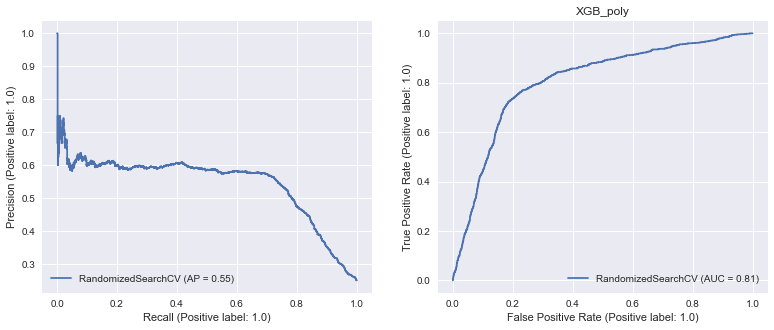

In [72]:
score_graph(random_xgb_poly, "XGB_poly", X_val_poly, y_val_poly, pred_val_poly)

### 오버샘플링

In [73]:
# from IPython.display import Image
# Image(r"C:\Users\inje.jeong\Desktop/발표용.PNG")

In [74]:
# from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_ovsp, y_train_ovsp = sm.fit_resample(X_train, list(y_train))

sm_poly = SMOTE(random_state=0)
X_train_poly_ovsp, y_train_poly_ovsp = sm_poly.fit_resample(X_train_poly, list(y_train_poly))

#### nopoly-oversampling

In [75]:
random_xgb_ovsp = RandomizedSearchCV(xgb,
                             param_distributions=param,
                             n_iter=10,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             random_state=1
                             )
random_xgb_ovsp.fit(X_train_ovsp, y_train_ovsp)

be_ovsp = random_xgb_ovsp.best_estimator_
pd.Series(be_ovsp.feature_importances_, index=X_train_ovsp.columns).sort_values(ascending=False)

c:\users\yws15\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:53:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


x3_unknown                    0.269409
city_development_index        0.140406
education_level               0.101251
last_new_job                  0.088601
enrolled_university           0.076058
x4_Pvt Ltd                    0.053841
experience                    0.037155
x4_unknown                    0.034918
city                          0.032376
x1_Has relevent experience    0.027880
x4_Public Sector              0.016290
training_hours                0.011461
x4_Early Stage Startup        0.011124
x3_50-99                      0.010650
x3__10                        0.010010
enrollee_id                   0.009590
x0_Male                       0.009154
x3_100-500                    0.008983
x3_10000+                     0.008414
x3_500-999                    0.007739
x3_1000-4999                  0.007629
x3_10/49                      0.007197
x0_Other                      0.004993
x0_Female                     0.004849
x4_Funded Startup             0.004529
x3_5000-9999             

In [76]:
pred_train_ovsp = random_xgb_ovsp.predict(X_train_ovsp)
pred_val_ovsp = random_xgb_ovsp.predict(X_val)

print('train accuracy :', accuracy_score(y_train_ovsp, pred_train_ovsp))
print('validation accuracy :', accuracy_score(y_val, pred_val_ovsp))

train accuracy : 0.8443208159480761
validation accuracy : 0.7883089770354906


#### poly-oversampleling

In [77]:
random_xgb_poly_ovsp = RandomizedSearchCV(xgb,
                             param_distributions=param,
                             n_iter=10,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             random_state=1
                             )
random_xgb_poly_ovsp.fit(X_train_poly_ovsp, y_train_poly_ovsp)

be_poly_ovsp = random_xgb_poly_ovsp.best_estimator_
pd.Series(be_poly_ovsp.feature_importances_, index=X_train_poly_ovsp.columns).sort_values(ascending=False)

c:\users\yws15\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


x1 x2                         0.287764
x4^2                          0.152542
x3_unknown                    0.082621
x5^2                          0.058791
x1 x3                         0.050579
enrolled_university           0.049016
last_new_job                  0.047248
city_development_index        0.028201
x1 x4                         0.018136
x3 x4                         0.016578
experience                    0.016296
x0 x2                         0.015596
x0 x5                         0.014166
city                          0.013848
x3 x5                         0.011641
education_level               0.010004
x2 x4                         0.008814
x1_Has relevent experience    0.007738
x4_unknown                    0.007271
x4 x5                         0.006011
x2 x3                         0.005951
training_hours                0.005839
x0 x4                         0.005798
x0 x3                         0.005731
x0 x1                         0.005389
x3_10000+                

In [78]:
pred_train_poly_ovsp = random_xgb_poly_ovsp.predict(X_train_poly_ovsp)
pred_val_poly_ovsp = random_xgb_poly_ovsp.predict(X_val_poly)

print('train accuracy :', accuracy_score(y_train_poly_ovsp, pred_train_poly_ovsp))
print('validation accuracy :', accuracy_score(y_val, pred_val_poly_ovsp))

train accuracy : 0.8485859990727863
validation accuracy : 0.7891440501043842


# 평가

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings(action='ignore')

In [179]:
y_test = pd.Series(np.load('hr_data/jobchange_test_target_values.npy'))
X_test = X_test_final

In [183]:
X_test.drop(columns='enrollee_id', inplace=True)

In [153]:
df = X_train_final

df.rename(columns = {'company_size_<10':'company_size__10'}, inplace = True)
df.rename(columns = {'x3_<10':'x3__10'}, inplace = True)
X_test_final.rename(columns = {'company_size_<10':'company_size__10'}, inplace = True)
X_test_final.rename(columns = {'x3_<10':'x3__10'}, inplace = True)

In [154]:
drop_cols = ['enrollee_id', 'target']
y = df['target']
X = df.drop(columns=drop_cols)

In [155]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=1, shuffle=True)

In [176]:
X_train

,x0_Female,x0_Male,x0_Other,x1_Has relevent experience,x1_No relevent experience,x2_no_major,x3_10/49,x3_100-500,x3_1000-4999,x3_10000+,...,x4_Public Sector,x4_Pvt Ltd,x4_unknown,city,city_development_index,enrolled_university,education_level,experience,last_new_job,training_hours
0,-0.472345,0.488271,-0.10101,-1.601582,1.601582,0.0,-0.289204,2.523548,-0.272457,-0.342592,...,-0.231411,-1.029998,-0.683194,1.098572,-0.538003,-0.581309,-0.196632,-1.193555,0.011206,2.108598
1,-0.472345,0.488271,-0.10101,0.624383,-0.624383,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,-0.231411,-1.029998,-0.683194,0.561325,-1.655108,-0.581309,-0.196632,0.278806,0.011206,-1.037533
2,-0.472345,0.488271,-0.10101,-1.601582,1.601582,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,-0.231411,-1.029998,1.463713,0.137182,0.741001,1.888615,-0.196632,0.426042,-0.586649,-0.221869
3,-0.472345,0.488271,-0.10101,-1.601582,1.601582,0.0,-0.289204,-0.396268,-0.272457,2.918925,...,-0.231411,0.970875,-0.683194,0.561325,-1.655108,-0.581309,-0.196632,-0.751847,-0.586649,-0.804486
4,-0.472345,0.488271,-0.10101,0.624383,-0.624383,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,-0.231411,0.970875,-0.683194,0.137182,0.741001,-0.581309,-0.196632,-0.899083,-0.586649,2.308353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317,2.117097,-2.048044,-0.10101,-1.601582,1.601582,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,-0.231411,0.970875,-0.683194,-1.106970,0.741001,-0.581309,-0.196632,-0.899083,0.011206,1.675797
13318,-0.472345,0.488271,-0.10101,0.624383,-0.624383,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,-0.231411,-1.029998,-0.683194,-1.106970,0.741001,-0.581309,-0.196632,1.162222,1.206917,-0.654670
13319,-0.472345,0.488271,-0.10101,0.624383,-0.624383,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,-0.231411,0.970875,-0.683194,0.589601,0.571006,-0.581309,-0.196632,1.603931,1.804773,-0.687962
13320,-0.472345,0.488271,-0.10101,0.624383,-0.624383,0.0,-0.289204,-0.396268,-0.272457,-0.342592,...,-0.231411,-1.029998,-0.683194,0.165458,-0.497528,-0.581309,-0.196632,-0.310139,-0.586649,1.659151


# under sampling 사용

In [156]:
# from imblearn.over_sampling import *
from imblearn.under_sampling import *
# from imblearn.combine import *

# over_sampling
# X_train, y_train = SMOTE().fit_resample(X_train, y_train)
# X_train, y_train = ADASYN().fit_resample(X_train, y_train)


# # under_sampling
X_train, y_train = TomekLinks().fit_resample(X_train, y_train)

# # combine_sampling
# X_train, y_train = SMOTEENN().fit_resample(X_train, y_train)
# X_train, y_train = SMOTETomek().fit_resample(X_train, y_train)

# Decision Tree

In [157]:
# 학습
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [158]:
# 검증
from sklearn.metrics import accuracy_score, classification_report

pred_train = tree.predict(X_train)
pred_val = tree.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.998498723915328
validation accuracy : 0.7183716075156577


## gridsearch

In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(
    max_depth=range(1, 10),
    max_leaf_nodes=range(1, 10),
    random_state=[1]
)

grid_tree = GridSearchCV(tree,
                         param_grid=param_grid,
                         scoring='accuracy',
                         cv=2,
                         n_jobs=-1)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(1, 10), 'random_state': [1]},
             scoring='accuracy')

In [121]:
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=9, random_state=1)

In [122]:
pred_train = grid_tree.predict(X_train)
pred_val = grid_tree.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.8113646599609668
validation accuracy : 0.7810020876826722


-----------------------------------
# RandomForest

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=7, max_features=12, n_estimators=200,
                       random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=12, n_estimators=200,
                       random_state=1)

In [124]:
pred_train = rf.predict(X_train)
pred_val = rf.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.8293799729770305
validation accuracy : 0.7908141962421712


## gridsearch

In [125]:
param_grid = dict(
    n_estimators=[200],
    max_features=range(10, 13),
    max_depth=range(1, 11),
    random_state=[1]
)

rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf,
                       param_grid=param_grid,
                       scoring='accuracy',
                       cv=3,
                       n_jobs=-1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(10, 13), 'n_estimators': [200],
                         'random_state': [1]},
             scoring='accuracy')

In [126]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=9, max_features=11, n_estimators=200,
                       random_state=1)

In [127]:
pred_train = grid_rf.predict(X_train)
pred_val = grid_rf.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.8491217534904669
validation accuracy : 0.791231732776618


-----------------------------------
# KNeighborsClassifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [129]:
pred_train = knn.predict(X_train)
pred_val = knn.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.843116649151779
validation accuracy : 0.7580375782881003


## gridsearch

In [130]:
grid_knn = GridSearchCV(knn,
                        param_grid=dict(n_neighbors=range(1, 10)),
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=2,
                       )
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 10)}, scoring='accuracy')

In [131]:
grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [132]:
pred_train = grid_knn.predict(X_train)
pred_val = grid_knn.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.8215733373367362
validation accuracy : 0.762839248434238


-----------------------------------
# svc

In [133]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [134]:
pred_train = svc.predict(X_train)
pred_val = svc.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.8193964870139618
validation accuracy : 0.7764091858037578


## RandomizedSearch

In [135]:
param = dict(
    kernel=['rbf', 'linear'],
    C=[0.01,  0.1, 1, 10],
    gamma=[0.01, 0.1,  1]
)

random_svc = RandomizedSearchCV(svc,
                                param_distributions=param,
                                n_iter=10,
                                scoring='accuracy',
                                n_jobs=-1,
                                cv=2)
random_svc.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['rbf', 'linear']},
                   scoring='accuracy')

In [136]:
random_svc.best_estimator_

SVC(C=0.1, gamma=1, kernel='linear')

In [137]:
pred_train = random_svc.predict(X_train)
pred_val = random_svc.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.7850923284792073
validation accuracy : 0.7734864300626305


-----------------------------------
# voting (hard)

In [138]:
from sklearn.ensemble import VotingClassifier

estimators = [('tree', tree),
              ('knn', knn), 
              ('random forest', rf), 
              ('svm', svc)]

voting = VotingClassifier(estimators)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('random forest', RandomForestClassifier()),
                             ('svm', SVC())])

In [139]:
pred_train = voting.predict(X_train)
pred_val = voting.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.926887854676475
validation accuracy : 0.783089770354906


# voting (soft)

In [140]:
# voting_soft = VotingClassifier(estimators, voting='soft')
# voting_soft.fit(X_train, y_train)

In [141]:
# pred_train = voting.predict(X_train)
# pred_val = voting.predict(X_val)

# print('train accuracy :', accuracy_score(y_train, pred_train))
# print('validation accuracy :', accuracy_score(y_val, pred_val))

-----------------------------------
# gradientboosting

In [142]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [143]:
pred_train = gb.predict(X_train)
pred_val = gb.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.8250262723314817
validation accuracy : 0.7922755741127349


## randomized

In [144]:
param = dict(
    n_estimators=[100, 200, 300, 400, 500],
    learning_rate=[0.001,0.005,0.01,0.05,0.1,0.5],
    max_depth=range(1, 5),
    subsample=[0.5,0.7,1]
)

random_gb = RandomizedSearchCV(gb,
                             param_distributions=param,
                             n_iter=10,
                             scoring='accuracy',
                             cv=3,
                             n_jobs=-1,
                             random_state=1
                             )
random_gb.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1, 0.5],
                                        'max_depth': range(1, 5),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 0.7, 1]},
                   random_state=1, scoring='accuracy')

In [145]:
random_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=400,
                           random_state=1, subsample=0.7)

In [146]:
pred_train = random_gb.predict(X_train)
pred_val = random_gb.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.8239753790722114
validation accuracy : 0.7954070981210856


-------------------------------------
# LogisticRegression

In [147]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1, C=1, max_iter=300)
lr.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=300, random_state=1)

In [148]:
pred_train = lr.predict(X_train)
pred_val = lr.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.767752589701246
validation accuracy : 0.761169102296451


-------------------------------------
# XGBoost

In [159]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[19:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
pred_train = xgb.predict(X_train)
pred_val = xgb.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.8988139918931092
validation accuracy : 0.7824634655532359


-------------------------------------
## randomized

In [161]:
param = dict(
    n_estimators = [100, 200, 300, 400, 500],
    learning_rate=[0.001,0.005,0.01,0.05,0.1,0.5],
    max_depth=range(1,7)
)

random_xgb = RandomizedSearchCV(xgb,
                                param_distributions=param,
                                n_iter=30,
                                scoring='accuracy',
                                cv=3,
                                n_jobs=-1,
                                random_state=1)
random_xgb.fit(X_train, y_train)

[19:03:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=6,
                                           num_parallel_tree=1, random_state=0,
                                           reg_alpha=0, reg_lambda=1,
                                       

In [162]:
random_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
## pred_train = random_xgb.predict(X_train)
pred_val = random_xgb.predict(X_val)

print('train accuracy :', accuracy_score(y_train, pred_train))
print('validation accuracy :', accuracy_score(y_val, pred_val))

train accuracy : 0.8988139918931092
validation accuracy : 0.7924843423799582


# test

In [185]:
# 검증
from sklearn.metrics import accuracy_score, classification_report
pred_test = tree.predict(X_test)

print('test accuracy tree:', accuracy_score(y_test, pred_test))

test accuracy tree: 0.6951620479098168


In [186]:
pred_test = grid_tree.predict(X_test)

print('test accuracy grid_tree:', accuracy_score(y_test, pred_test))

test accuracy grid_tree: 0.7844058243306716


In [205]:
# pred_test = rf.predict(X_test)

# print('test accuracy rf:', accuracy_score(y_test, pred_test))

In [194]:
pred_test = grid_rf.predict(X_test)

print('test accuracy grid_rf:', accuracy_score(y_test, pred_test))

test accuracy grid_rf: 0.7895725692813528


In [195]:
pred_test = knn.predict(X_test)

print('test accuracy knn:', accuracy_score(y_test, pred_test))

test accuracy knn: 0.7477689055894786


In [196]:
pred_test = grid_knn.predict(X_test)

print('test accuracy grid_knn:', accuracy_score(y_test, pred_test))

test accuracy grid_knn: 0.7491780178487553


In [197]:
pred_test = svc.predict(X_test)

print('test accuracy svc:', accuracy_score(y_test, pred_test))

test accuracy svc: 0.782996712071395


In [198]:
pred_test = random_svc.predict(X_test)

print('test accuracy random_svc:', accuracy_score(y_test, pred_test))

test accuracy random_svc: 0.7623297322686707


In [199]:
pred_test = voting.predict(X_test)

print('test accuracy voting:', accuracy_score(y_test, pred_test))

test accuracy voting: 0.7712541099107563


In [200]:
pred_test = gb.predict(X_test)

print('test accuracy gb:', accuracy_score(y_test, pred_test))

test accuracy gb: 0.782996712071395


In [201]:
pred_test = random_gb.predict(X_test)

print('test accuracy random_gb:', accuracy_score(y_test, pred_test))

test accuracy random_gb: 0.7862846406763739


In [202]:
pred_test = lr.predict(X_test)

print('test accuracy lr:', accuracy_score(y_test, pred_test))

test accuracy lr: 0.7585720995772663


In [203]:
pred_test = xgb.predict(X_test)

print('test accuracy xgb:', accuracy_score(y_test, pred_test))

test accuracy xgb: 0.7792390793799906


In [204]:
pred_test = random_xgb.predict(X_test)

print('test accuracy random_xgb:', accuracy_score(y_test, pred_test))

test accuracy random_xgb: 0.7895725692813528
